# The Carnot Cycle (He · ideal)

*Alexander Osorio C., October 2025*

## Setup

Before we begin our analysis, we'll set up our environment by installing necessary libraries and configuring our workspace.

### Installing PYroMat

In [1]:
# Install PYroMat library for thermodynamic calculations
# If running on Google Colab, uncomment the next line to install PYroMat.
# !pip install pyromat

### Importing packages

Python libraries for thermodynamics, numerical calculations, data handling, and visualization.

In [2]:
import pyromat as pyro               # Thermodynamic properties
import numpy as np                   # Numerical operations
import pandas as pd                  # Data manipulation
import seaborn as sns                # Data visualization
import matplotlib.pyplot as plt      # Plotting graphs
import scipy.integrate as integrate  # Numerical integration

### Configuring the visualization theme

We'll use Seaborn to enhance the aesthetics of the plots for better visualization.

In [3]:
# Uses seaborn to update matplotlib's run commands (rc) parameters to improve aesthetics

sns.set_theme(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1.2,
    color_codes=True
)

### Setting SI units in PYroMat

In [4]:
pyro.config["unit_pressure"] = "kPa"
pyro.config["unit_energy"]   = "kJ"
pyro.config["unit_matter"]   = "kg"

## Introduction

The Carnot cycle is a fundamental concept in thermodynamics, proposed by Nicolas Léonard Sadi Carnot in 1824. It represents an idealized heat engine with maximum possible efficiency operating between two temperature reservoirs. Understanding this cycle is crucial for analyzing and designing more practical thermal engines like the Otto and Diesel cycles. In this notebook, we'll explore the Carnot cycle in detail, to aid in designing other thermal engines.

## Objective

Our goal is to:

- Calculate the thermodynamic properties (pressure, volume, temperature, enthalpy, entropy) at each state of the Carnot cycle using the ideal gas model and PYroMat.
- Analyze each process to determine the work done and heat transferred.
- Determine the efficiency and net work output of the Carnot cycle.
- Visualize the cycle using *P-𝑣*, *T-s*, and other relevant diagrams.


## Understanding the Carnot Cycle

The Carnot cycle consists of four reversible processes involving an ideal gas:

1. **Isothermal Expansion (1 $\to$ 2)**: The gas is compressed isothermally, releasing heat $Q_C$ to a cold reservoir at temperature $T_C$.
2. **Adiabatic Expansion (2 $\to$ 3)**: The gas is compressed without heat exchange, raising its temperature back from $T_C$ to $T_H$.
3. **Isothermal Compression (3 $\to$ 4)**: The gas expands isothermally, absorbing heat $Q_H$ from a hot reservoir at temperature $T_H$. 
4. **Adiabatic Compression (4 $\to$ 1)**: The gas continues to expand without exchanging heat, causing its temperature to drop from $T_H$ to $T_C$.

<img src="images/c-carnot_cycle.png" alt="Carnot cycle on P–v" style="zoom:30%;" />

## Problem Statement

We shall analyze a Carnot cycle using **Helium (He)** as the working fluid with the following conditions:

- Initial state with $T_1 = 300 \, \mathrm{K}$ and $P_1 = 100 \, \mathrm{kPa}$.
- State 3: $T_3 = 500 \, \mathrm{K}$ and $P_3 = 1 \, \mathrm{MPa}$.

## Working Fluid: Helium

To analyze the cycle, we'll retrieve the properties of He using PYroMat.

### Retrieving He data

In [5]:
# Get He data as an ideal gas
He = pyro.get('ig.He')

### Gas Properties

#### Gas Constant

In [6]:
R = He.R()  # Retrieve the gas constant for Helium
print(f'Gas Constant (R): {R:.4f} kJ/(kg·K)')

Gas Constant (R): 2.0773 kJ/(kg·K)


#### Specific heat @ constant pressure

$c_p$ is used when calculating enthalpy, which is the amount of heat added or removed during isobaric processes:

In [7]:
cp = He.cp()[0]  # Retrieve specific heat at constant pressure
print(f'Specific heat at constant pressure (c𝘱): {cp:.4f} kJ/(kg·K)')

Specific heat at constant pressure (c𝘱): 5.1932 kJ/(kg·K)


#### Specific heat @ constant volume

Similarly, $c_v$ is used to calculate the change in internal energy:

In [8]:
cv = He.cv()[0]  # Retrieve specific heat at constant volume
print(f'Specific heat at constant volume (cᵥ): {cv:.4f} kJ/(kg·K)')

Specific heat at constant volume (cᵥ): 3.1159 kJ/(kg·K)


#### Ratio of specific heats, $k = \frac{c_p}{c_v}$

This quantity is critical for analyzing adiabatic processes:

In [9]:
k = He.gam()[0]  # Retrieve the specific heats ratio
print(f'Specific heat ratio (𝑘): {k:.4f}')

Specific heat ratio (𝑘): 1.6667


## State Properties

### State 1: Initial conditions

#### Temperature

In [10]:
T1 = 300  # K
print(f'T₁: {T1} K')

T₁: 300 K


#### Pressure

In [11]:
P1 = 100  # kPa
print(f'P₁: {P1} KPa')

P₁: 100 KPa


#### Specific volume

Using the ideal gas law:

$$ \upsilon_1 = \frac{R \: T_1}{P_1} $$

In [12]:
v1 = R * T1 / P1  # Calculate specific volume using the ideal gas law
print(f'𝑣₁: {v1:.4f} m³/kg')

𝑣₁: 6.2318 m³/kg


#### Internal energy

$$ u_1 = c_{\upsilon} \cdot T_1 $$


In [13]:
u1 = cv * T1  # Calculate internal energy of an ideal gas
print(f'u₁: {u1:.2f} kJ/kg')

u₁: 934.77 kJ/kg


#### Specific enthalpy

$$ h_1 = c_p \cdot T_1 $$

In [14]:
h1 = cp * T1  # Calculate internal energy of an ideal gas
print(f'h₁: {h1:.1f} kJ/kg')

h₁: 1557.9 kJ/kg


#### Specific entropy

For an ideal gas, entropy needs a reference value, which means we can set

$$ s_1 = 0 $$

In [15]:
s1 = 0  # reference value for entropy
print(f's₁: {s1:.1f} kJ/(kg·K)')

s₁: 0.0 kJ/(kg·K)


### State 3

We continue with this state instead of going to State 2, since there is only one unknown property.

#### Temperature

This property is already defined in the problem:

In [16]:
T3 = 500  # K
print(f'T₃: {T3} K')

T₃: 500 K


#### Pressure

Pressure was also given in the problem statement:

$$ P_3 = 1 \, \mathrm{MPa} = 1000 \, \mathrm{kPa}$$

In [17]:
P3 = 1000  # kPa
print(f'P₃: {P3} kPa')

P₃: 1000 kPa


#### Specific volume

Using the ideal gas law:

$$ \upsilon_3 = \frac{R \: T_3}{P_3} $$

In [18]:
v3 = R * T3 / P3  # Calculate specific volume using the ideal gas law
print(f'𝑣₃: {v3:.4f} m³/kg')

𝑣₃: 1.0386 m³/kg


#### Internal energy

$$ u_3 = c_{\upsilon} \cdot T_3 $$


In [19]:
u3 = cv * T3  # Calculate internal energy of an ideal gas
print(f'u₃: {u3:.1f} kJ/kg')

u₃: 1557.9 kJ/kg


#### Specific enthalpy

$$ h_3 = c_p \cdot T_3 $$

In [20]:
h3 = cp * T3  # Calculate internal energy of an ideal gas
print(f'h₃: {h3:.1f} kJ/kg')

h₃: 2596.6 kJ/kg


#### Specific entropy

To find the entropy value for each state we can use either

$$ s(T,P) = s_\text{ref} + c_p \, \ln \left( \frac{T}{T_\text{ref}} \right) - R \, \ln \left( \frac{P}{P_\text{ref}} \right) $$

or

$$ s(T,\upsilon) = s_\text{ref} + c_{\upsilon} \, \ln \left( \frac{T}{T_\text{ref}} \right) + R \, \ln \left( \frac{\upsilon}{\upsilon_\text{ref}} \right) $$

with

$$ s_\text{ref} = s_1 = 0, \: \: T_\text{ref} = T_1, \: \: \text{and } P_\text{ref} = P_1 $$

In [21]:
s3 = s1 + cp * np.log(T3/T1) - R * np.log(P3/P1) # entropy for an ideal gas
print(f's₃: {s3:.4f} kJ/(kg·K)')

s₃: -2.1303 kJ/(kg·K)


### State 2

#### Temperature

Since process **1 $\to$ 2** is an **isothermal compression**:

$$ T_2 = T_1 $$

In [22]:
T2 = T1
print(f'T₂: {T2} K')

T₂: 300 K


#### Specific volume

Knowing that process **2 $\to$ 3** is an **adiabatic compression**, the specific volume at State 2 can be calculated using the following relationship for adiabatic processes:

$$ T_2 \: \upsilon^{k-1} _2 = T_3 \: \upsilon^{k-1} _3 $$

Solving for $\upsilon_2$:

$$ \upsilon_2 = \upsilon_3 \cdot \Big( \frac{T_3}{T_2} \Big)^{\frac{1}{k-1}} $$

In [23]:
v2 = v3 * np.power(T3/T2, 1/(k-1))  # Calculate using the adiabatic relationship

print(f'𝑣₂: {v2:.4f} m³/kg')

𝑣₂: 2.2348 m³/kg


#### Pressure

Using the ideal gas law:

$$ P_2 = \frac{R \: T_2}{\upsilon_2} $$

In [24]:
P2 = R * T2 / v2  # Calculate pressure using the ideal gas law
print(f'Pressure (P₂): {P2:.2f} kPa')

Pressure (P₂): 278.85 kPa


#### Internal energy

$$ u_2 = c_{\upsilon} \cdot T_2 $$


In [25]:
u2 = cv * T2  # Calculate internal energy of an ideal gas
print(f'u₂: {u2:.2f} kJ/kg')

u₂: 934.77 kJ/kg


#### Specific enthalpy

$$ h_2 = c_p \cdot T_2 $$

In [26]:
h2 = cp * T2  # Calculate internal energy of an ideal gas
print(f'h₂: {h2:.1f} kJ/kg')

h₂: 1557.9 kJ/kg


#### Specific entropy

We will use:

$$ s_2 = s_1 + c_p \, \ln \left( \frac{T_2}{T_1} \right) - R \, \ln \left( \frac{P_2}{P_1} \right) $$

In [27]:
s2 = s1 + cp * np.log(T2/T1) - R * np.log(P2/P1) # entropy for an ideal gas
print(f's₂: {s2:.4f} kJ/(kg·K)')

s₂: -2.1303 kJ/(kg·K)


### State 4

#### Temperature

This is the final state of the **isothermal expansion** that started at state 3, which means:

$$ T_4 = T_3 $$

In [28]:
T4 = T3
print(f'T₄: {T4} K')

T₄: 500 K


#### Specific volume

Process **4 $\to$ 1** is an **adiabatic expansion**, which allow us to use the adiabatic relationship:

$$ T_4 \: \upsilon^{k-1} _4 = T_1 \: \upsilon^{k-1} _1 $$

Solving for $\upsilon_4$:

$$ \upsilon_4 = \upsilon_1 \cdot \Big( \frac{T_1}{T_4} \Big)^{\frac{1}{k-1}} $$

In [29]:
v4 = v1 * np.power(T1/T4, 1/(k-1))  # Calculate v4 using the adiabatic relationship
print(f'𝑣₄: {v4:.4f} m³/kg')

𝑣₄: 2.8963 m³/kg


#### Pressure

Using the ideal gas model:

$$ P_4 = \frac{R \: T_4}{\upsilon_4} $$

In [30]:
P4 = R * T4 / v4  # Calculate pressure using the ideal gas law
print(f'Pressure (P₄): {P4:.2f} kPa')

Pressure (P₄): 358.61 kPa


#### Internal energy

$$ u_4 = c_{\upsilon} \cdot T_4 $$


In [31]:
u4 = cv * T4  # Calculate internal energy of an ideal gas
print(f'u₄: {u4:.1f} kJ/kg')

u₄: 1557.9 kJ/kg


#### Specific enthalpy

$$ h_4 = c_p \cdot T_4 $$

In [32]:
h4 = cp * T4  # Calculate internal energy of an ideal gas
print(f'h₄: {h4:.1f} kJ/kg')

h₄: 2596.6 kJ/kg


#### Specific entropy

$$ s_4 = s_1 + c_p \, \ln \left( \frac{T_4}{T_1} \right) - R \, \ln \left( \frac{P_4}{P_1} \right) $$

In [33]:
s4 = s1 + cp * np.log(T4/T1) - R * np.log(P4/P1) # entropy for an ideal gas
print(f's₄: {s4:.1f} kJ/(kg·K)')

s₄: 0.0 kJ/(kg·K)


### Summarizing State Properties

Here is a summary of the key thermodynamic properties at each relevant state of the Carnot cycle.

In [34]:
states = {
    1: {"P (kPa)": P1, "v (m³/kg)": v1, "T (K)": T1, "u (kJ/kg)": u1, "h (kJ/kg)": h1, "s (kJ/(kg·K))": s1},
    2: {"P (kPa)": P2, "v (m³/kg)": v2, "T (K)": T2, "u (kJ/kg)": u2, "h (kJ/kg)": h2, "s (kJ/(kg·K))": s2},
    3: {"P (kPa)": P3, "v (m³/kg)": v3, "T (K)": T3, "u (kJ/kg)": u3, "h (kJ/kg)": h3, "s (kJ/(kg·K))": s3},
    4: {"P (kPa)": P4, "v (m³/kg)": v4, "T (K)": T4, "u (kJ/kg)": u4, "h (kJ/kg)": h4, "s (kJ/(kg·K))": s4}
}

carnot_states = (
    pd.DataFrame.from_dict(states, orient="index")
      .rename_axis("State")
      .sort_index()
)

# Nice-looking styled view in Jupyter (won’t affect exports)
styled = (carnot_states
          .style
          .format({"P (kPa)": "{:,.1f}", "v (m³/kg)": "{:,.4f}", "T (K)": "{:,.1f}", "u (kJ/kg)": "{:,.1f}", "h (kJ/kg)": "{:,.1f}", "s (kJ/(kg·K))": "{:,.4f}"})
          .set_caption("Carnot Cycle State Properties (He, ideal)"))
styled

,P (kPa),v (m³/kg),T (K),u (kJ/kg),h (kJ/kg),s (kJ/(kg·K))
State,,,,,,
1,100.0,6.2318,300.0,934.8,"1,557.9",0.0000
2,278.9,2.2348,300.0,934.8,"1,557.9",-2.1303
3,"1,000.0",1.0386,500.0,"1,557.9","2,596.6",-2.1303
4,358.6,2.8963,500.0,"1,557.9","2,596.6",0.0000


### Carnot Engine

<img src="images/carnot_cycle-2.png" alt="Carnot cycle on P–v" style="zoom:30%;" />

## Thermodynamic Diagrams

### Functions to Create the Arrays for the Diagrams

#### Isothermal process function

Let's assume a process that ocurrs between two states at constant temperature. We will define what the arrays would look like for an isothermal process:


- **Temperature (`T_array`)**: Remains unchanged, so it will be an array filled with constant temperature value `T_const`.

- **Specific volume (`v_array`)**: Changes from values `v_start` to `v_end`.

- **Pressure (`P_array`)**: Changes as specific volume changes, calculated using the ideal gas law: $P = \frac{R \, T_\text{const}}{\upsilon}$.

- **Enthalpy (`h_array`)**: will have a constant value $h = c_p \, T_\text{const}$.

- **Entropy (`s_array`)**: Varies following $s = s_\text{ref} + c_p \, \ln \left(\frac{T}{T_\text{ref}} \right) - R \, \ln \left( \frac{P}{P_\text{ref}} \right)$

#### Code for the Arrays

The next code cell defines a function to model isothermal processes.

In [35]:
# Defines a function to model isothermal processes

def isothermal_process(R, cp, T_ref, P_ref, s_ref, T_const, v_start, v_end, points):
    
    """
    Parameters:
    
    - R: Specific gas constant of the gas
    
    - cp, T_ref, P_ref, s_ref: Reference properties for enthalpy and entropy calculations

    - T_const: Constant temperature during the process
    
    - v_start: Initial specific volume
    - v_end: Final specific volume
    
    - points: Number of data points to generate.

    Returns:

    - Arrays for Temperature (T_array), Specific Volume (v_array), Pressure (P_array),
      Enthalpy (h_array), and Entropy (s_array)
    """

    # Creates an array filled with the constant temperature value T_const
    T_array = np.full(points, T_const)

    # Volume array
    v_array = np.linspace(v_start, v_end, points)

    # Pressure array, calculated using the ideal gas model
    P_array = R * T_array / v_array

    # Enthalpy array filled with the constant value cp * T_const
    h_array = np.full(points, cp * T_const)

    # Entropy array
    s_array = s_ref + cp * np.log(T_array/T_ref) - R * np.log(P_array/P_ref)

    return T_array, v_array, P_array, h_array, s_array

#### Adiabatic process function

Here We will define what the arrays would look like for an adiabatic process:

- **Specific volume (`v_array`)**: Changes from values `v_start` to `v_end`.

- **Pressure (`P_array`)**: Calculated with the adiabatic relationship $P = P_\text{start} \, \Big( \frac{\upsilon_\text{start}}{\upsilon} \Big)^k$

- **Temperature (`T_array`)**: Calculated using the ideal gas law: $T = \frac{P \, \upsilon}{R}$.

- **Enthalpy (`h_array`)**: Changes linearly with temperature, according to $h = c_p \, T$.

- **Entropy (`s_array`)**: Varies following $s = s_\text{ref} + c_p \, \ln \left(\frac{T}{T_\text{ref}} \right) - R \, \ln \left( \frac{P}{P_\text{ref}} \right)$

#### Code for the Arrays

The next code cell defines a function to model adiabatic processes.

In [36]:
# Defines a function to model adiabatic processes

def adiabatic_process(R, k, cp, T_ref, P_ref, s_ref, P_start, v_start, v_end, points):
    
    """
    Parameters:
    
    - R: Specific gas constant of the gas

    - k: Ratio of specific heats (c_p / c_v)

    - cp, T_ref, P_ref, s_ref: Reference properties for enthalpy and entropy calculations

    - P_start: Initial pressure

    - v_start: Initial specific volume
    - v_end: Final specific volume
    
    - points: Number of data points to generate.

    Returns:

    - Arrays for Temperature (T_array), Specific Volume (v_array), Pressure (P_array),
      Enthalpy (h_array), and Entropy (s_array).
    """

    # Volume array
    v_array = np.linspace(v_start, v_end, points)

    # Pressure array calculated adiabatically: P·v^k = c
    P_array = P_start * np.power(v_start/v_array, k)

    # Temperature array using the ideal gas law
    T_array = P_array * v_array / R

    # Enthalpy array
    h_array = cp * T_array

    # Entropy array
    s_array = s_ref + cp * np.log(T_array/T_ref) - R * np.log(P_array/P_ref)

    return T_array, v_array, P_array, h_array, s_array

### Simulating Processes

#### Number of data points for the arrays

In [37]:
points = 1000  # Number of points

#### Process 1 → 2: Isothermal compression

To visualize it, we create the arrays of temperature, volume, pressure, enthalpy, and entropy throughout the process. We'll generate these arrays using the `isothermal_process` function.

- **Temperature (T)** remains constant at $T_\text{const} = T_1$.
- **Specific volume ($\upsilon$)** reduces from $\upsilon_\text{start} = \upsilon_1$ to $\upsilon_\text{end} = \upsilon_2$.
- **Pressure (P)** increases according to $P = \frac{R \, T_\text{const}}{\upsilon}$.
- **Enthalpy (h)** remains constant at $h = c_p \, T_\text{const}$.

In [38]:
# Simulate the isothermal compression from state 1 to state 2
T12, v12, P12, h12, s12 = isothermal_process(
    R       = R,
    cp      = cp,
    T_ref   = T1,
    P_ref   = P1,
    s_ref   = s1,
    T_const = T1,
    v_start = v1,
    v_end   = v2,
    points  = points
)

#### Process 2 → 3: Adiabatic compression

In this process:
- **Specific Volume:** Diminishes from $\upsilon_\text{start} = \upsilon_2$ to $\upsilon_\text{end} = \upsilon_3$. 
- **Pressure (P):** Calculated using $P = P_\text{start} \, \left( \frac{\upsilon_\text{start}}{v} \right)^k$.
- **Temperature (T):** Calculated using the ideal gas law $T = \frac{P \, \upsilon}{R}$.
- **Entropy (s):** Should be constant during this process.

In [39]:
# Simulate the adiabatic compression from state 2 to state 3
T23, v23, P23, h23, s23 = adiabatic_process(
    R       = R,
    k       = k,
    cp      = cp,
    T_ref   = T1,
    P_ref   = P1,
    s_ref   = s1,
    P_start = P2,
    v_start = v2,
    v_end   = v3,
    points  = points
)

#### Process 3 → 4: Isothermal expansion

In [40]:
# Simulate the isothermal expansion from state 3 to state 4
T34, v34, P34, h34, s34 = isothermal_process(
    R       = R,
    cp      = cp,
    T_ref   = T1,
    P_ref   = P1,
    s_ref   = s1,
    T_const = T3,
    v_start = v3,
    v_end   = v4,
    points  = points
)

#### Process 4 → 1: Adiabatic expansion

In [41]:
# Simulate the adiabatic expansion from state 4 to state 1
T41, v41, P41, h41, s41 = adiabatic_process(
    R       = R,
    k       = k,
    cp      = cp,
    T_ref   = T1,
    P_ref   = P1,
    s_ref   = s1,
    P_start = P4,
    v_start = v4,
    v_end   = v1,
    points  = points
)

### $P-\upsilon$ Diagrams

The following plot represents the Carnot cycle on a **P-$\upsilon$ linear scale**.

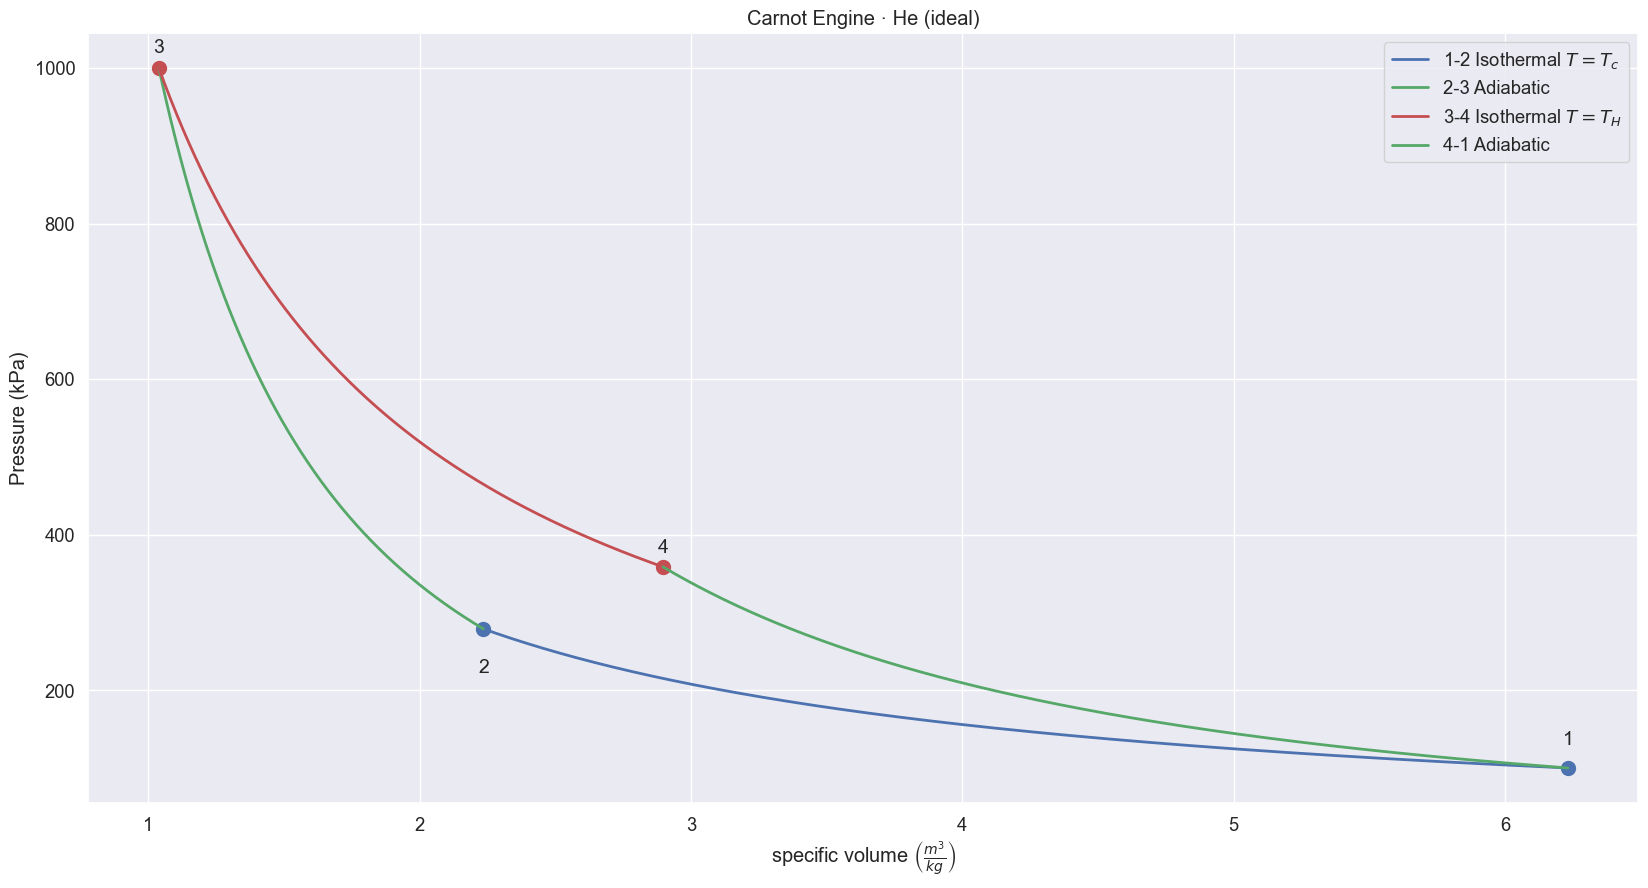

In [42]:
fig, ax = plt.subplots(figsize=(20, 10))

# Title
ax.set_title(r'Carnot Engine · He (ideal)')

# Swithing to logarithmic axis scales 
#ax.set_xscale('log')
#ax.set_yscale('log')

# State markers
ax.plot([v1, v2], [P1, P2], 'bo', markersize=10)  # States 1-2
ax.plot([v3, v4], [P3, P4], 'ro', markersize=10)  # States 3-4

# State annotations
ax.annotate('1', xy=(v1, P1), xytext=(v1, P1*1.3), fontsize=14, ha='center')   # State 1
ax.annotate('2', xy=(v2, P2), xytext=(v2, P2*0.8), fontsize=14, ha='center')   # State 2
ax.annotate('3', xy=(v3, P3), xytext=(v3, P3*1.02), fontsize=14, ha='center')  # State 3
ax.annotate('4', xy=(v4, P4), xytext=(v4, P4*1.05), fontsize=14, ha='center')  # State 4

# Process curves
ax.plot(v12, P12, 'b-', linewidth=2, label=r'1-2 Isothermal $T=T_c$')  # 1➛2: Isothermal
ax.plot(v23, P23, 'g-', linewidth=2, label= '2-3 Adiabatic')           # 2➛3: Adiabatic
ax.plot(v34, P34, 'r-', linewidth=2, label=r'3-4 Isothermal $T=T_H$')  # 3➛4: Isothermal
ax.plot(v41, P41, 'g-', linewidth=2, label= '4-1 Adiabatic')           # 4➛1: Adiabatic

# Axis labels
ax.set_ylabel('Pressure (kPa)')
ax.set_xlabel(r'specific volume $\left(\frac{m^3}{kg}\right)$')

# Legend
ax.grid(True)                # Enable grid
ax.legend(loc='upper right') # Show legend and adjusts its position to minimize overlap

plt.show()

### $T-\upsilon$ Diagram

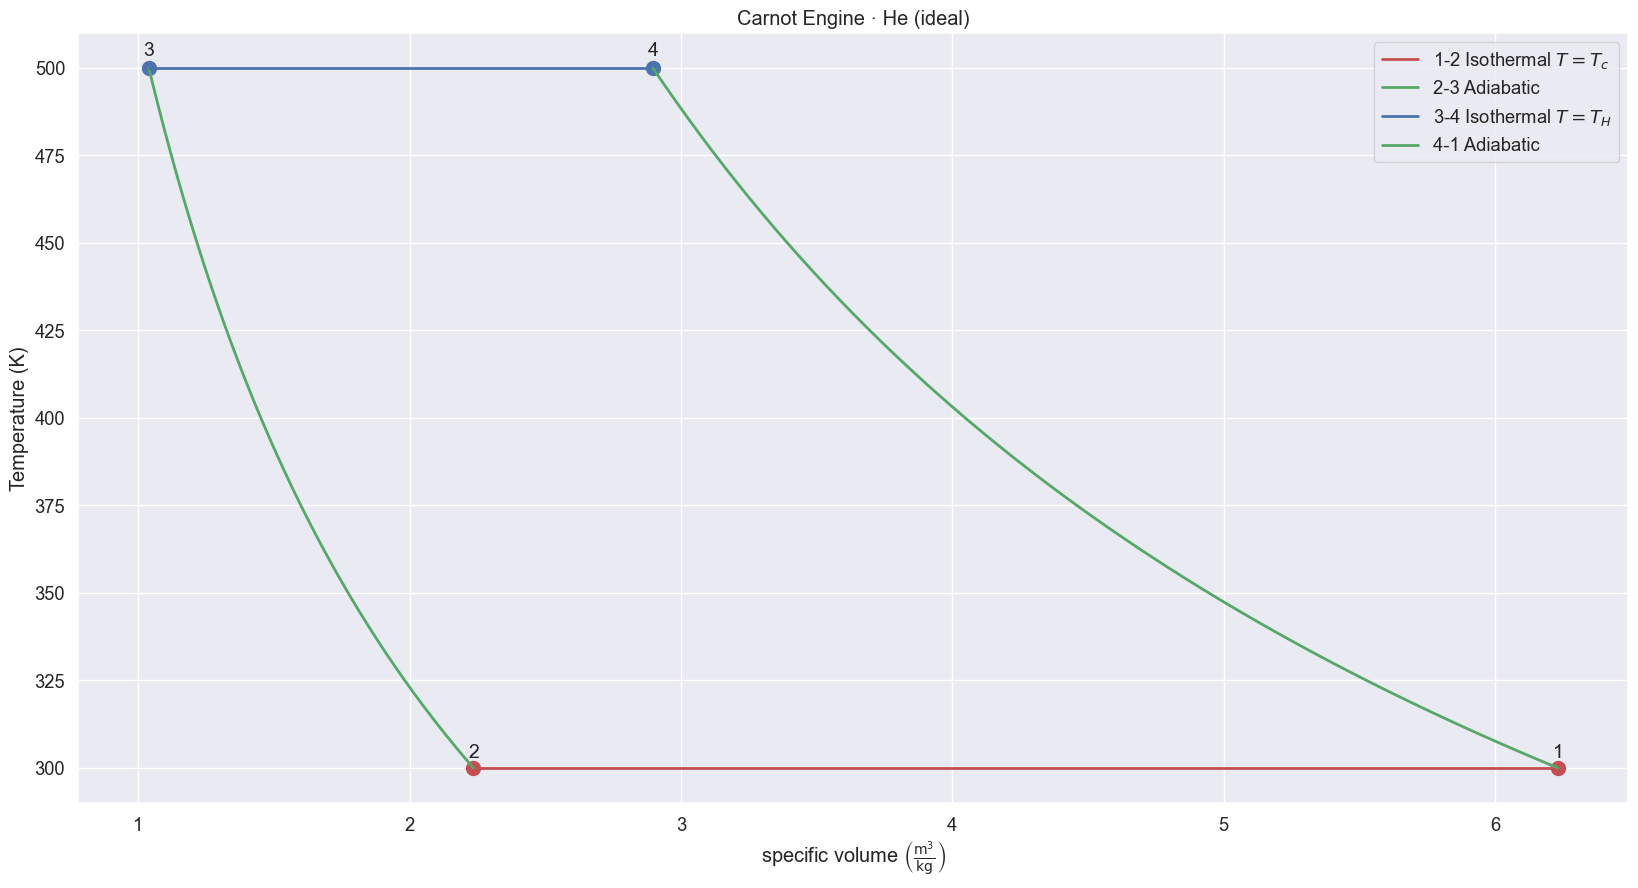

In [43]:
fig, ax = plt.subplots(figsize=(20, 10))

# Title
ax.set_title('Carnot Engine · He (ideal)')

# State markers
ax.plot([v1, v2], [T1, T2], 'ro', markersize=10)  # States 1-2
ax.plot([v3, v4], [T3, T4], 'bo', markersize=10)  # States 3-4

# State annotations
ax.annotate('1', xy=(v1, T1), xytext=(v1, T1*1.01), fontsize=14, ha='center')   # State 1
ax.annotate('2', xy=(v2, T2), xytext=(v2, T2*1.01), fontsize=14, ha='center')   # State 2
ax.annotate('3', xy=(v3, T3), xytext=(v3, T3*1.007), fontsize=14, ha='center')  # State 3
ax.annotate('4', xy=(v4, T4), xytext=(v4, T4*1.007), fontsize=14, ha='center')  # State 4

# Process curves
ax.plot(v12, T12, 'r-', linewidth=2, label=r'1-2 Isothermal $T=T_c$')  # 1➛2: Isothermal
ax.plot(v23, T23, 'g-', linewidth=2, label= '2-3 Adiabatic')           # 2➛3: Adiabatic
ax.plot(v34, T34, 'b-', linewidth=2, label=r'3-4 Isothermal $T=T_H$')  # 3➛4: Isothermal
ax.plot(v41, T41, 'g-', linewidth=2, label= '4-1 Adiabatic')           # 4➛1: Adiabatic

# Axis labels and formatting
ax.set_ylabel('Temperature (K)')
ax.set_xlabel(r'specific volume $\left( \mathrm{\frac{m^3}{kg}} \right)$')

ax.grid(True) # Enable grid for better readability
ax.legend()   # Display legend to identify processes

plt.show()

### $T-s$ Diagram

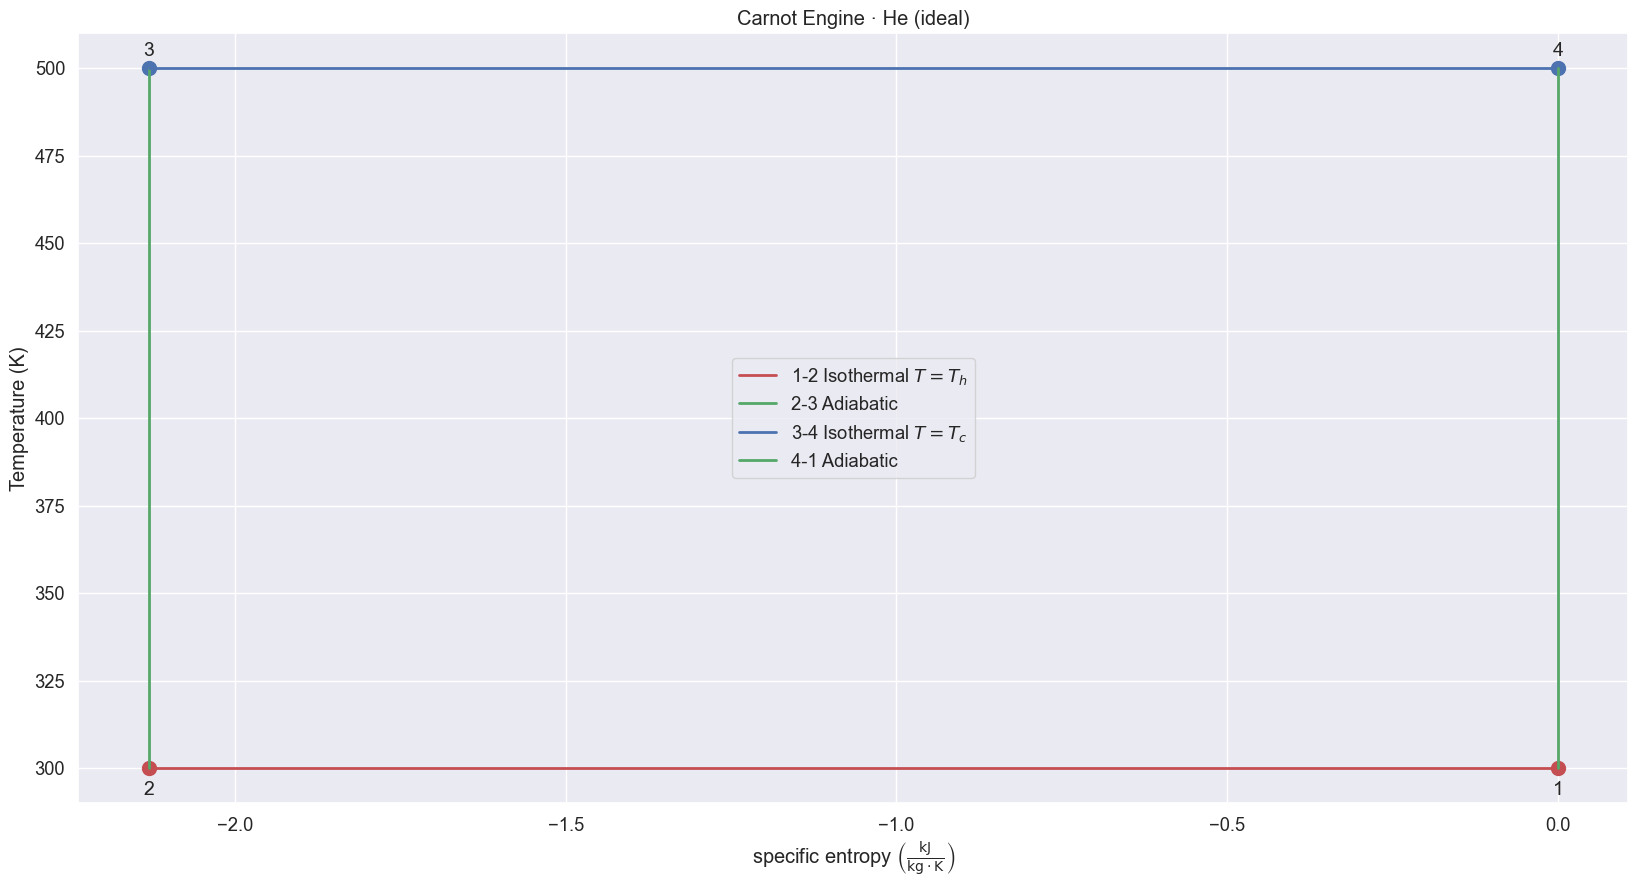

In [44]:
fig, ax = plt.subplots(figsize=(20,10))

# Title
ax.set_title('Carnot Engine · He (ideal)')

# State markers
ax.plot([s1, s2], [T1, T2], 'ro', markersize=10)  # States 1-2
ax.plot([s3, s4], [T3, T4], 'bo', markersize=10)  # States 3-4

# State annotations
ax.annotate('1', xy=(s1, T1), xytext=(s1, T1*0.975), fontsize=14, ha='center')  # State 1
ax.annotate('2', xy=(s2, T2), xytext=(s2, T2*0.975), fontsize=14, ha='center')  # State 2
ax.annotate('3', xy=(s3, T3), xytext=(s3, T3*1.007), fontsize=14, ha='center')  # State 3
ax.annotate('4', xy=(s4, T4), xytext=(s4, T4*1.007), fontsize=14, ha='center')  # State 4

# Process curves
ax.plot(s12, T12, 'r-', linewidth=2, label=r'1-2 Isothermal $T=T_h$')  # 1➛2: Isothermal
ax.plot(s23, T23, 'g-', linewidth=2, label= '2-3 Adiabatic')           # 2➛3: Adiabatic
ax.plot(s34, T34, 'b-', linewidth=2, label=r'3-4 Isothermal $T=T_c$')  # 3➛4: Isothermal
ax.plot(s41, T41, 'g-', linewidth=2, label= '4-1 Adiabatic')           # 4➛1: Adiabatic

# Axis labels
ax.set_ylabel('Temperature (K)')
ax.set_xlabel(r'specific entropy $\left( \mathrm{\frac{kJ}{kg \cdot K}} \right)$')

ax.grid(True) # Enable grid
ax.legend()   # Show legend

plt.show()

### $h-s$ (Mollier) Diagram

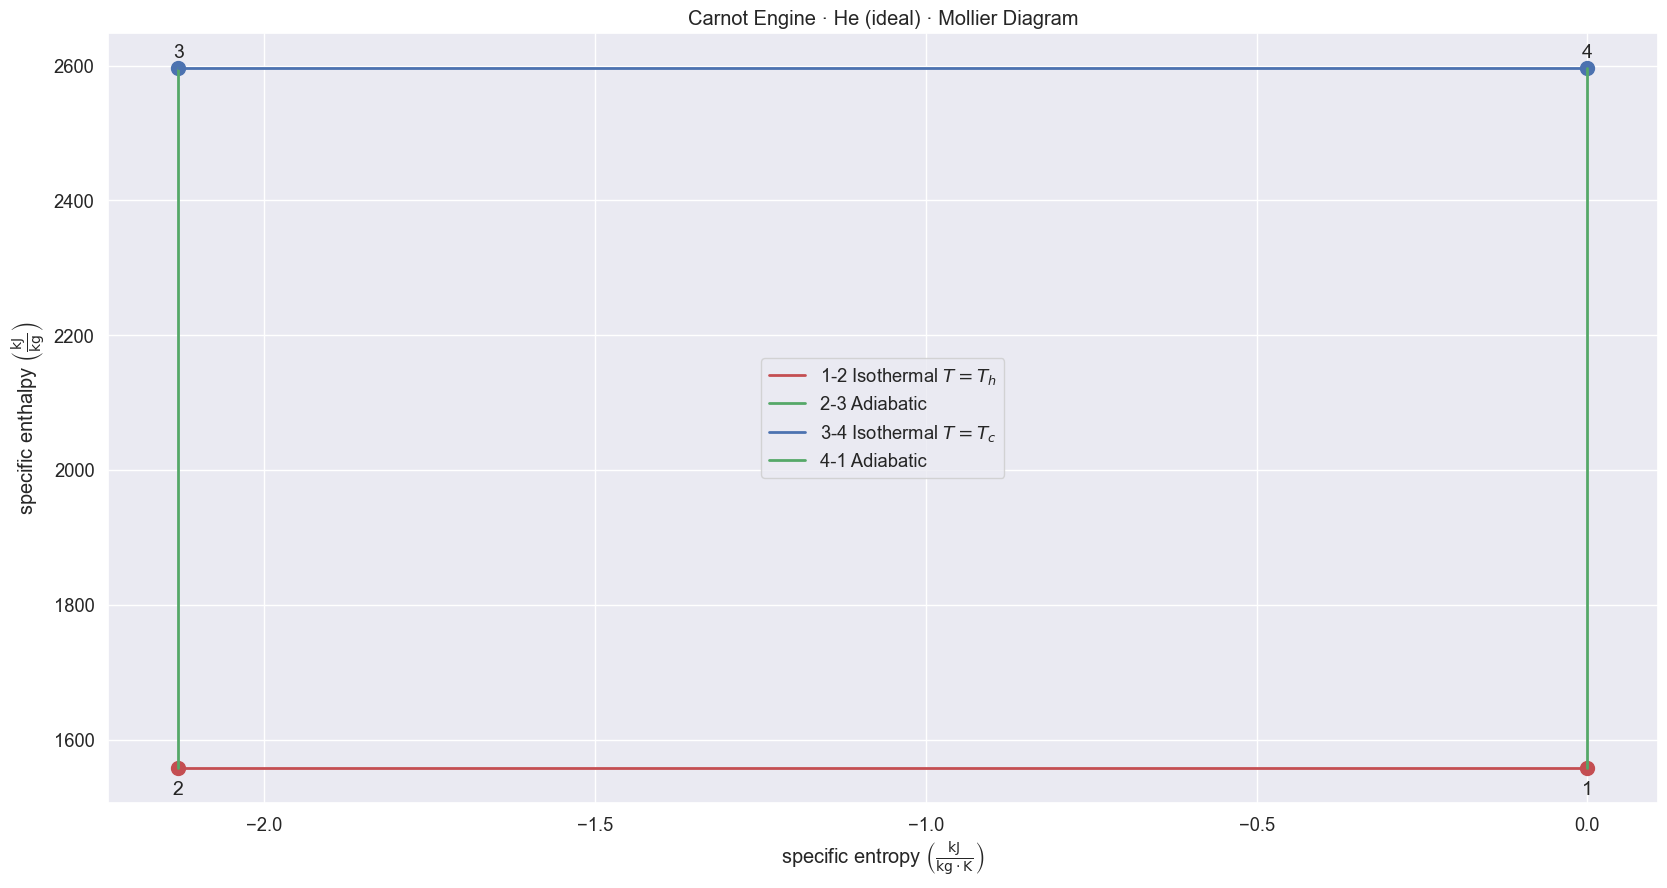

In [45]:
fig, ax = plt.subplots(figsize=(20,10))

# Title4
ax.set_title('Carnot Engine · He (ideal) · Mollier Diagram')

# State markers
ax.plot([s1, s2], [h1, h2], 'ro', markersize=10)  # States 1-2
ax.plot([s3, s4], [h3, h4], 'bo', markersize=10)  # States 3-4

# State annotations
ax.annotate('1', xy=(s1, h1), xytext=(s1, h1*0.975), fontsize=14, ha='center')  # State 1
ax.annotate('2', xy=(s2, h2), xytext=(s2, h2*0.975), fontsize=14, ha='center')  # State 2
ax.annotate('3', xy=(s3, h3), xytext=(s3, h3*1.006), fontsize=14, ha='center')  # State 3
ax.annotate('4', xy=(s4, h4), xytext=(s4, h4*1.006), fontsize=14, ha='center')  # State 4

# Process curves
ax.plot(s12, h12, 'r-', linewidth=2, label=r'1-2 Isothermal $T=T_h$')  # 1➛2: Isothermal
ax.plot(s23, h23, 'g-', linewidth=2, label= '2-3 Adiabatic')           # 2➛3: Adiabatic
ax.plot(s34, h34, 'b-', linewidth=2, label=r'3-4 Isothermal $T=T_c$')  # 3➛4: Isothermal
ax.plot(s41, h41, 'g-', linewidth=2, label= '4-1 Adiabatic')           # 4➛1: Adiabatic

# Axis labels
ax.set_ylabel(r'specific enthalpy $\left( \mathrm{\frac{kJ}{kg}} \right)$')
ax.set_xlabel(r'specific entropy $\left( \mathrm{\frac{kJ}{kg \cdot K}} \right)$')

ax.grid(True) # Enable grid
ax.legend()   # Show legend

plt.show()

### $P-h$ Diagram

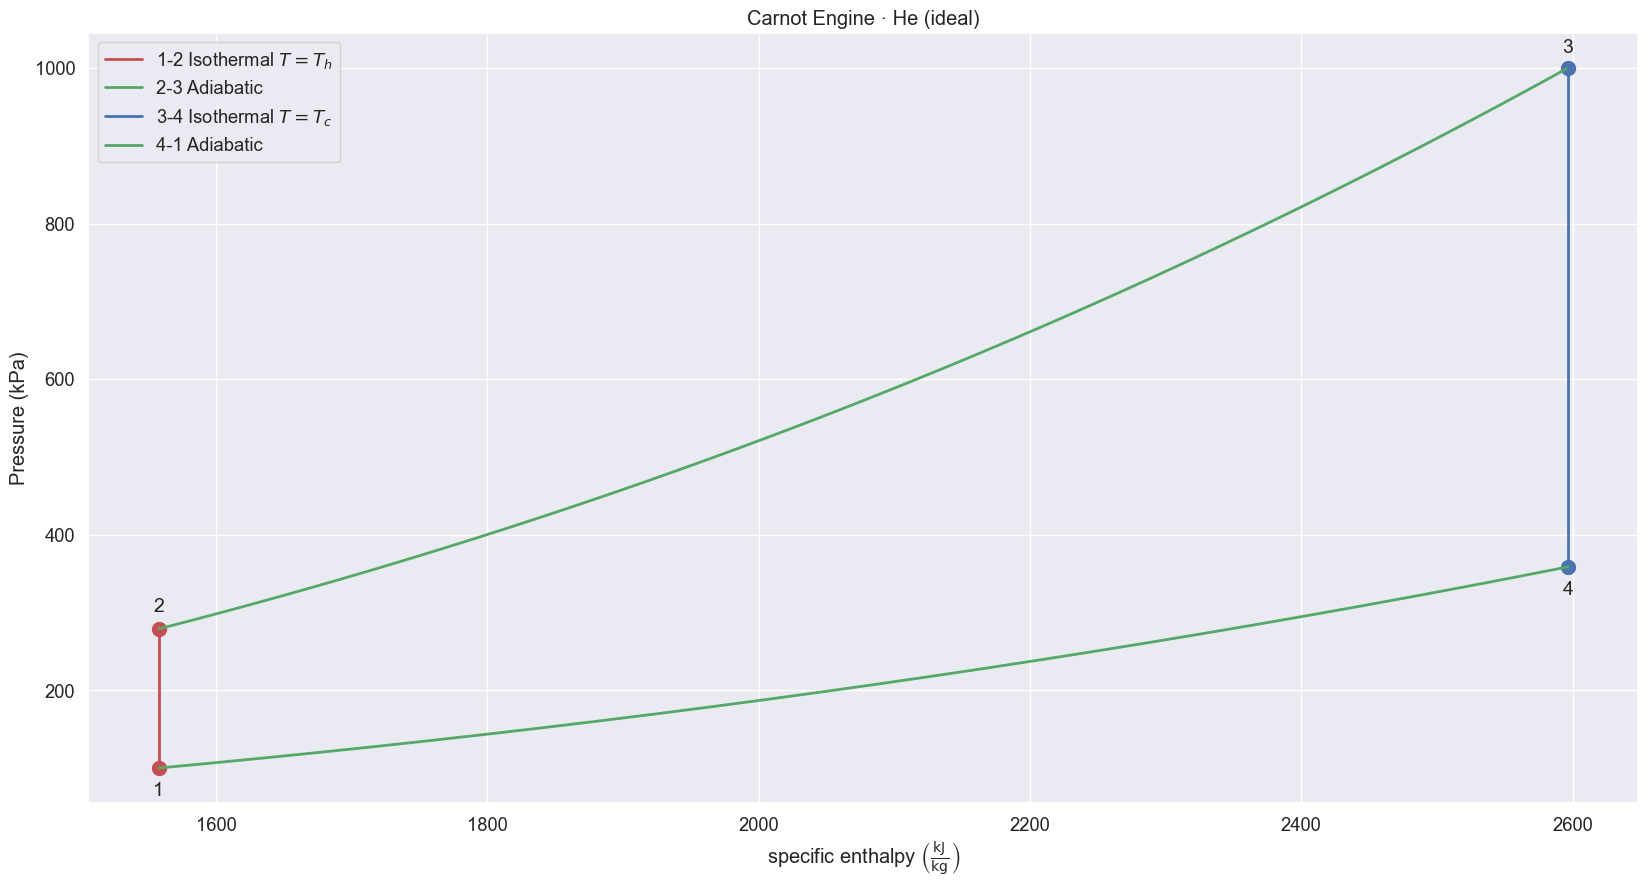

In [46]:
fig, ax = plt.subplots(figsize=(20,10))

# title
ax.set_title('Carnot Engine · He (ideal)')

# State markers
ax.plot([h1, h2], [P1, P2], 'ro', markersize=10)  # States 1-2
ax.plot([h3, h4], [P3, P4], 'bo', markersize=10)  # States 3-4

# State annotations
ax.annotate('1', xy=(h1, P1), xytext=(h1, P1*0.65), fontsize=14, ha='center')  # State 1
ax.annotate('2', xy=(h2, P2), xytext=(h2, P2*1.08), fontsize=14, ha='center')  # State 2
ax.annotate('3', xy=(h3, P3), xytext=(h3, P3*1.02), fontsize=14, ha='center')  # State 3
ax.annotate('4', xy=(h4, P4), xytext=(h4, P4*0.90), fontsize=14, ha='center')  # State 4

# process curves 
ax.plot(h12, P12, 'r-', linewidth=2, label=r'1-2 Isothermal $T=T_h$')  # 1➛2: Isothermal
ax.plot(h23, P23, 'g-', linewidth=2, label= '2-3 Adiabatic')           # 2➛3: Adiabatic
ax.plot(h34, P34, 'b-', linewidth=2, label=r'3-4 Isothermal $T=T_c$')  # 3➛4: Isothermal
ax.plot(h41, P41, 'g-', linewidth=2, label= '4-1 Adiabatic')           # 4➛1: Adiabatic

# Set axis labels
ax.set_ylabel('Pressure (kPa)')
ax.set_xlabel(r'specific enthalpy $\left( \mathrm{\frac{kJ}{kg}} \right)$')

ax.grid(True) # Enable grid
ax.legend()   # Show legend

plt.show()

## Energy Balance in Processes

### Process 1 $\to$ 2: Isothermal Compression

#### Change in specific internal energy

The change in specific internal energy for an ideal gas during an isothermal process is zero, as internal energy is a function of temperature which remains constant.

$$ \Delta u_{12} = c_{\upsilon} \, (T_2 - T_1) = 0 $$

In [47]:
energy_12 = 0
print(f'𝚫u₁₂: {energy_12:.1f} kJ/kg')

𝚫u₁₂: 0.0 kJ/kg


#### Specific work

The work done by the system during an isothermal process is calculated through:

$$ w_{12} = R \: T_1 \cdot \ln \Big( \frac{v_2}{v_1} \Big) $$

In [48]:
work_12 = R * T1 * np.log(v2/v1)
print(f'w₁₂: {work_12:.2f} kJ/kg')

w₁₂: -639.08 kJ/kg


#### Heat per unit mass

$$ q_{12} = \Delta u_{12} + w_{12} = w_{12} $$

In [49]:
heat_12 = work_12    # Heat absorbed is equal to the work done, as internal energy change is zero
print(f'Heat per unit mass (q₁₂): {heat_12:.2f} kJ/kg')

Heat per unit mass (q₁₂): -639.08 kJ/kg


#### Change in specific enthalpy

$$ \Delta h_{12} = c_p \, (T_2 - T_1) = 0 $$

In [50]:
enthalpy_12 = 0
print(f'𝚫h₁₂: {enthalpy_12:.1f} kJ/kg')

𝚫h₁₂: 0.0 kJ/kg


#### Change in specific entropy



The change in entropy value can be found with either

$$ \Delta s_{12}(T,P) = c_p \, \ln \left( \frac{T_2}{T_1} \right) - R \, \ln \left( \frac{P_2}{P_1} \right) $$

or

$$ \Delta s_{12}(T,\upsilon) = c_{\upsilon} \, \ln \left( \frac{T_2}{T_1} \right) + R \, \ln \left( \frac{\upsilon_2}{\upsilon_1} \right) $$

In isothermal processes:

$$\ln \left( \frac{T_2}{T_1} \right) = 0$$

Therefore:

$$ \Delta s_{12} = R \; \ln \left( \frac{\upsilon_2}{\upsilon_1} \right)$$ or $$ \Delta s_{12} = - R \; \ln \left( \frac{P_2}{P_1} \right)$$

In [51]:
entropy_12 = R * np.log(v2/v1)
print(f'𝚫s₁₂: {entropy_12:.4f} kJ/(kg·K)')

𝚫s₁₂: -2.1303 kJ/(kg·K)


In an isothermal process, the entropy can also be obtained by:

$$ \Delta s_{12} = \frac{q_{12}}{T_1} $$

In [52]:
entropy_12 = heat_12 / T1         # Entropy change calculated from heat transfer
print(f'𝚫s₁₂: {entropy_12:.4f} kJ/(kg·K)')

𝚫s₁₂: -2.1303 kJ/(kg·K)


### Process 2 $\to$ 3: Adiabatic Compression

#### Change in specific internal energy

$$ \Delta u_{23} = c_{\upsilon} \, (T_3 - T_2) $$

In [53]:
energy_23 = cv * (T3 - T2)    # Using constant cv
print(f'𝚫u₂₃: {energy_23:.2f} kJ/kg')

𝚫u₂₃: 623.18 kJ/kg


#### Specific work

Adiabatic processes ideally involve no heat transfer, but work is done by the system.

$$ w_{23} = \frac{1}{1-k} \: \left( P_3 \, \upsilon_3 - P_2 \, \upsilon_2 \right) $$

In [54]:
work_23 = (P3*v3 - P2*v2)/(1-k)
print(f'w₂₃: {work_23:.2f} kJ/kg')

w₂₃: -623.18 kJ/kg


#### Heat per unit mass

During adiabatic processes, there is no heat exchange with the surroundings.

$$ q_{23} = \Delta u_{23} + w_{23} = 0 $$

In [55]:
heat_23 = 0 
print(f'q₂₃: {heat_23:.1f} kJ/kg')

q₂₃: 0.0 kJ/kg


#### Change in specific enthalpy

$$ \Delta h_{23} = c_p \, (T_3 - T_2) $$

In [56]:
enthalpy_23 = cp * (T3 - T2)
print(f'𝚫h₂₃: {enthalpy_23:.1f} kJ/kg')

𝚫h₂₃: 1038.6 kJ/kg


#### Change in specific entropy

In an ideal adiabatic process the change in entropy should be zero:

$$ \Delta s_{23} = s_3 - s_2 = 0 $$

In [57]:
entropy_23 = s3 - s2
print(f'𝚫s₂₃: {entropy_23:.1f} kJ/(kg·K)')

𝚫s₂₃: -0.0 kJ/(kg·K)


### Process 3 $\to$ 4: Isothermal Expansion

#### Change in specific internal energy

As expected in an isothermal process for an ideal gas, since there is no change in temperature the change in internal energy is zero.

$$ \Delta u_{34} = c_v \, (T_4 - T_3) = 0 $$

In [58]:
energy_34 = 0  # Calculated using constant cv, should be zero
print(f'𝚫u₃₄: {energy_34:.1f} kJ/kg')

𝚫u₃₄: 0.0 kJ/kg


#### Specific work

$$ w_{34} = R \: T_3 \cdot \ln \Big( \frac{v_4}{v_3} \Big) $$

In [59]:
work_34 = R * T3 * np.log(v4/v3)
print(f'w₃₄: {work_34:.1f} kJ/kg')

w₃₄: 1065.1 kJ/kg


#### Heat per unit mass

$$ q_{34} = \Delta u_{34} + w_{34} = 0 $$

In [60]:
heat_34 = work_34
print(f'q₃₄: {heat_34:.1f} kJ/kg')

q₃₄: 1065.1 kJ/kg


#### Change in specific enthalpy

No changes in enthalpy are expected.

$$ \Delta h_{34} = c_p \, (T_4 - T_3) = 0 $$

In [61]:
enthalpy_34 = 0  # No change in enthalpy during isothermal process
print(f'𝚫h₂₃: {enthalpy_34:.1f} kJ/kg')

𝚫h₂₃: 0.0 kJ/kg


#### Change in specific entropy

The entropy change can be found using:

$$ \Delta s_{34} = R \; \ln \left( \frac{\upsilon_4}{\upsilon_3} \right)$$

In [62]:
entropy_34 = R * np.log(v4/v3)
print(f'𝚫s₃₄): {entropy_34:.4f} kJ/(kg·K)')

𝚫s₃₄): 2.1303 kJ/(kg·K)


The entropy can also be obtained, in an isothermal process, as :

$$ \Delta s_{34} = \frac{q_{34}}{T_3} $$

In [63]:
entropy_34 = heat_34 / T3  # Entropy change due to heat transfer
print(f'𝚫s₃₄: {entropy_34:.4f} kJ/(kg·K)')

𝚫s₃₄: 2.1303 kJ/(kg·K)


### Process 4 $\to$ 1: Adiabatic Expansion

This final phase of the Carnot cycle involves an adiabatic process, returning the system to its initial state. Similar to the previous adiabatic compression, this process is characterized by no heat exchange with the surroundings.

#### Change in specific internal energy

$$ \Delta u_{41} = c_v \, (T_1 - T_4) $$

In [64]:
energy_41 = cv * (T1 - T4)  # Calculated using constant cv
print(f'𝚫u₄₁: {energy_41:.2f} kJ/kg')

𝚫u₄₁: -623.18 kJ/kg


#### Specific work

$$ w_{41} = \frac{1}{1-k} \: \left( P_1 \, \upsilon_1 - P_4 \, \upsilon_4 \right) $$

In [65]:
work_41 = (P1 * v1 - P4 * v4) / (1 - k)  # Theoretical calculation using the adiabatic equation
print(f'w₄₁: {work_41:.2f} kJ/kg')

w₄₁: 623.18 kJ/kg


#### Heat per unit mass

$$ q_{41} = \Delta u_{41} + w_{41} = 0 $$

In [66]:
heat_41 = 0
print(f'q₄₁: {heat_41:.1f} kJ/kg')

q₄₁: 0.0 kJ/kg


#### Change in specific enthalpy

$$ \Delta h_{41} = c_p \, (T_1 - T_4) $$

In [67]:
enthalpy_41 = cp * (T1 - T4)
print(f'𝚫h₄₁: {enthalpy_41:.1f} kJ/kg')

𝚫h₄₁: -1038.6 kJ/kg


#### Change in specific entropy

For an adiabatic process:

$$ \Delta s_{41} = 0 $$

In [68]:
entropy_41 = s1 - s4  # Change in entropy, indicating the degree of reversibility
print(f'𝚫s₄₁): {entropy_41:.1f} kJ/(kg·K)')

𝚫s₄₁): 0.0 kJ/(kg·K)


### Balance of Energy in each Process · Summary

In this section, we summarize the energy transfers in each process of the Carnot cycle. These summaries provide insights into the work done, heat transferred, and changes in internal energy, enthalpy, and entropy.

In [69]:
# Define the data for each process under ideal assumptions
processes = {
    '1➛2': {'q (kJ/kg)': heat_12, 'w (kJ/kg)': work_12, 'Δu (kJ/kg)': energy_12, 'Δh (kJ/kg)': enthalpy_12, 'Δs (kJ/(kg·K))': entropy_12},
    '2➛3': {'q (kJ/kg)': heat_23, 'w (kJ/kg)': work_23, 'Δu (kJ/kg)': energy_23, 'Δh (kJ/kg)': enthalpy_23, 'Δs (kJ/(kg·K))': entropy_23},
    '3➛4': {'q (kJ/kg)': heat_34, 'w (kJ/kg)': work_34, 'Δu (kJ/kg)': energy_34, 'Δh (kJ/kg)': enthalpy_34, 'Δs (kJ/(kg·K))': entropy_34},
    '4➛1': {'q (kJ/kg)': heat_41, 'w (kJ/kg)': work_41, 'Δu (kJ/kg)': energy_41, 'Δh (kJ/kg)': enthalpy_41, 'Δs (kJ/(kg·K))': entropy_41}
}

carnot_processes = (
    pd.DataFrame.from_dict(processes, orient="index")
      .rename_axis("Process")
      .sort_index()
)

# Nice-looking styled view in Jupyter (won’t affect exports)
styled = (carnot_processes
          .style
          .format({"q (kJ/kg)": "{:,.1f}", "w (kJ/kg)": "{:,.1f}", "Δu (kJ/kg)": "{:,.2f}", "Δh (kJ/kg)": "{:,.1f}", "Δs (kJ/(kg·K))": "{:,.4f}"})
          .set_caption("Carnot Cycle · Processes (He, ideal)"))
styled

,q (kJ/kg),w (kJ/kg),Δu (kJ/kg),Δh (kJ/kg),Δs (kJ/(kg·K))
Process,,,,,
1➛2,-639.1,-639.1,0.00,0.0,-2.1303
2➛3,0.0,-623.2,623.18,"1,038.6",-0.0000
3➛4,"1,065.1","1,065.1",0.00,0.0,2.1303
4➛1,0.0,623.2,-623.18,"-1,038.6",0.0000


## Energy Analysis of the Carnot Cycle

To understand the total energy transformation, we analyze the changes in internal energy, work, and heat transfers throughout the Carnot cycle.

### Internal Energy Changes

We start by listing the changes in internal energy for each process:

In [70]:
energy_changes = [energy_12, energy_23, energy_34, energy_41]  # Changes in internal energy under ideal assumptions

#### Net Change of Internal Energy of the Cycle

The net change in internal energy for a complete cycle should theoretically sum to zero:

$$ \Delta u_{cycle} = 0 $$

In [71]:
internal_energy_cycle = sum(energy_changes)
print(f'Net change of internal energy: {internal_energy_cycle:.1f} kJ/kg')

Net change of internal energy: 0.0 kJ/kg


### Work

Next, we calculate the work done in each process of the cycle:

In [72]:
works = [work_12, work_23, work_34, work_41]  # Work done during each process

#### Net Work of the Cycle

The net work done by the cycle is calculated by summing the work done in each process:

In [73]:
work_net = sum(works)
print(f'Net work: {work_net:.3f} kJ/kg')

Net work: 426.056 kJ/kg


### Heat Transfers

Here we list the heat transfers for each process, critical for understanding the cycle's efficiency and energy dynamics:

In [74]:
heat_transfers = [heat_12, heat_23, heat_34, heat_41]  # Heat transfers under ideal gas model assumptions

#### Net Heat of the Cycle

Similarly, the net heat for the cycle is obtained by summing the heat transferred in each process:

In [75]:
heat_net = sum(heat_transfers)
print(f'Net heat transfer: {heat_net:.3f} kJ/kg')

Net heat transfer: 426.056 kJ/kg


This analysis allows us to verify the first law of thermodynamics across the Carnot cycle, demonstrating the conservation of energy. Both the net work and net heat transferred over the cycle should be equal.

### Thermal Efficiency

#### Heat Taken from the Hot Reservoir

The heat from the hot source $(q_h)$, is the total of all positive heat transfers, representing the energy absorbed from the surroundings.

In [76]:
# Calculate heat from the hot source (sum of the positive values)

qh = sum(q for q in heat_transfers if q > 0)
print(f'Heat from the hot reservoir (qh): {qh:.2f} kJ/kg')

Heat from the hot reservoir (qh): 1065.14 kJ/kg


#### Heat Rejected to the Cold Reservoir

The heat expelled to the cold sink $(q_c)$, is the absolute value of the total negative heat transfers, representing the energy rejected back to the surroundings.

In [77]:
# Calculate heat expelled to the cold sink (sum of the negative values)

qc = np.fabs(sum(q for q in heat_transfers if q < 0))
print(f'Heat expelled to the cold sink (qc): {qc:.2f} kJ/kg')

Heat expelled to the cold sink (qc): 639.08 kJ/kg


#### Thermodynamic Efficiency of the Engine

$\eta$ is a measure of the engine's effectiveness in converting the input energy into useful work:

$$ \eta = \frac{\mathrm{Desired} \; \mathrm{Output}}{\mathrm{Required} \; \mathrm{Input}} $$

It can be calculated using the work output relative to the heat input:

$$ \eta = \frac{w_{cycle}}{q_h} $$

Another way to compute the efficency is based on the heat rejected and heat absorbed:

$$ \eta = 1 - \frac{q_c}{q_h} $$

In [78]:
efficiency = 1 - (qc / qh)
print(f'Thermal efficiency (η): {efficiency:.1%}')

Thermal efficiency (η): 40.0%


### Reversible *(Carnot)* Efficiency

#### Temperature of the Hot Reservoir

The temperature of the hot reservoir, $T_h$, represents the maximum thermal energy input into the cycle. It is identified by finding the highest temperature among the critical states in the cycle.

In [79]:
# Determine the highest temperature in the cycle
Th = max(T1, T2, T3, T4)
print(f'Temperature of the hot reservoir (Th): {Th} K')

Temperature of the hot reservoir (Th): 500 K


#### Temperature of the Cold Sink

Similarly, the temperature of the cold sink, $T_c$, is defined as the lowest temperature at which the cycle expels heat.

In [80]:
# Determine the lowest temperature in the cycle
Tc = min(T1, T2, T3, T4)
print(f'Temperature of the cold sink (Tc): {Tc} K')

Temperature of the cold sink (Tc): 300 K


#### Reversible Cycle (Carnot) Efficiency

The Carnot or reversible cycle efficiency represents the theoretical maximum efficiency that any heat engine operating between two temperatures can achieve. It is defined by the following relation:

$$ \eta_{rev} = 1 - \frac{T_c}{T_h} $$

This efficiency calculation assumes no irreversibilities and is purely based on the temperature limits of the heat engine.

In [81]:
# Calculate the Carnot efficiency
efficiency_carnot = 1 - Tc / Th
print(f'Efficiency of the reversible Carnot engine (ηrev): {efficiency_carnot:.1%}')

Efficiency of the reversible Carnot engine (ηrev): 40.0%


#### Total heat transfer

The total heat transfer for the cycle can also be calculated using the integral of temperature with respect to entropy across all processes:

$$ q_{cycle} = \oint {T \, ds}  = \int _{s_1} ^{s_2}  T \, ds + \int _{s_2} ^{s_3}  T \, ds +\int _{s_3} ^{s_4}  T \, ds + \int _{s_4} ^{s_1}  T \, ds$$

In [82]:
# Calculate the total heat transfer using the integral of T ds
heat_cycle = integrate.simpson(T12, x=s12) + integrate.simpson(T23, x=s23) + integrate.simpson(T34, x=s34) + integrate.simpson(T41, x=s41)
print(f'q cycle: {heat_cycle:.3f} kJ/kg')  # Display the calculated heat transfer

q cycle: 426.056 kJ/kg


### Specific Entropy Changes

The changes in entropy for each process will be stored in:

In [83]:
entropy_changes = [entropy_12, entropy_23, entropy_34, entropy_41]  # Changes in internal energy under ideal assumptions

#### Net change of specific entropy of the cycle

In [84]:
entropy_net = sum(entropy_changes)
print(f'Net change of entropy: {entropy_net:.1f} kJ/kg')

Net change of entropy: -0.0 kJ/kg


$$ \Delta s_{cycle} = \oint {\frac{dq}{T}} $$

#### Change of entropy of the source

In [85]:
# Entropy decrease of the source from heat addition to the engine at high temperature
entropy_source = - heat_34 / T3
print(f'Entropy increase from heat addition at Th: {entropy_source:.4f} kJ/(kg·K)')

Entropy increase from heat addition at Th: -2.1303 kJ/(kg·K)


#### Change of entropy of the sink

In [86]:
# Entropy increase of the sink from heat rejection of the engine at low temperature
entropy_sink = np.abs(heat_12) / T1
print(f'Entropy decrease from heat rejection at T_C: {entropy_sink:.4f} kJ/(kg·K)')

Entropy decrease from heat rejection at T_C: 2.1303 kJ/(kg·K)


#### Change of entropy of the universe

In [87]:
# Total entropy change of the universe
entropy_universe = entropy_net + entropy_source + entropy_sink
print(f'Total entropy change of the universe: {entropy_universe:.4f} kJ/(kg·K)')

Total entropy change of the universe: -0.0000 kJ/(kg·K)


## Functions for Isochoric and Isobaric Processes

The Carnot cycle, which we've analyzed so far, consists exclusively of isothermal and adiabatic processes. However, other fundamental thermodynamic cycles include **isochoric** (constant volume) and **isobaric** (constant pressure) processes, which we will explore in this section. 

Here, we will demonstrate how to define arrays for isochoric and isobaric processes. Understanding these processes helps extend our analysis beyond the Carnot cycle, providing insights into other practical engineering applications.

### Isochoric Processes

Let's assume a process that ocurrs between two states at constant volume. We will define what the arrays would look like for an isochoric process:


- **Specific volume (`v_array`)**: Remains unchanged, so it will be an array filled with constant volume value `v_const`.

- **Temperature (`T_array`)**: Changes from values `T_start` to `T_end`.

- **Pressure (`P_array`)**: Changes as temperature changes, calculated using the ideal gas law: $P = \frac{R \, T}{\upsilon}$.

- **Enthalpy (`h_array`)**: Changes linearly with temperature, according to $h = c_p \, T$.

- **Entropy (`s_array`)**: Varies following $s = s_\text{ref} + c_p \, \ln \left(\frac{T}{T_\text{ref}} \right) + R \, \ln \left( \frac{\upsilon}{\upsilon_\text{ref}} \right)$

#### Code for the Arrays

The next code cell defines a function to model isochoric processes.

In [88]:
# Defines a function to model isochoric processes

def isochoric_process(R, cp, T_ref, v_ref, s_ref, v_const, T_start, T_end, points):
    
    """
    Parameters:
    
    - R: Specific gas constant of the gas
    
    - cp, T_ref, v_ref, s_ref: Reference properties for enthalpy and entropy calculations

    - v_const: Constant specific volume during the process
    
    - T_start: Initial temperature
    - T_end  : Final temperature
    
    - points: Number of data points to generate

    Returns:

    - Arrays for Temperature (T_array), Specific Volume (v_array), Pressure (P_array),
      Enthalpy (h_array), and Entropy (s_array)
    """

    # Creates an array filled with the constant volume value v_const
    v_array = np.full(points, v_const)

    # Temperature array
    T_array = np.linspace(T_start, T_end, points)

    # Pressure array, calculated using the ideal gas model
    P_array = R * T_array / v_array

    # Enthalpy array
    h_array = cp * T_array

    # Entropy array
    s_array = s_ref + cp * np.log(T_array/T_ref) + R * np.log(v_array/v_ref)

    return T_array, v_array, P_array, h_array, s_array

#### Simulating an isochoric process

To use it, *uncomment* the next cell (erase the `"""` at the beginning and at the end of the cell).

In [89]:
"""
points = 1000  # Number of points to define the process arrays

# Simulates an isochoric process from state 1 to state 2

T12, v12, P12, h12, s12 = isochoric_process(
    R       = R,
    cp      = cp,
    T_ref   = T1,
    v_ref   = v1,
    s_ref   = s1,
    v_const = v1,
    T_start = T1,
    T_end   = T2,
    points  = points
)
"""

'\npoints = 1000  # Number of points to define the process arrays\n\n# Simulates an isochoric process from state 1 to state 2\n\nT12, v12, P12, h12, s12 = isochoric_process(\n    R       = R,\n    cp      = cp,\n    T_ref   = T1,\n    v_ref   = v1,\n    s_ref   = s1,\n    v_const = v1,\n    T_start = T1,\n    T_end   = T2,\n    points  = points\n)\n'

### Isobaric Processes

Let's assume a process that ocurrs between two states at constant pressure. We will define what the arrays would look like for an isobaric process:


- **Pressure (`P_array`)**: Remains unchanged, so it will be an array filled with constant volume value `P_const`.

- **Specific volume (`v_array`)**: Changes from values `v_start` to `v_end`.

- **Temperature (`T_array`)**: Changes as specific volume changes, calculated using the ideal gas law: $T = \frac{P \, \upsilon}{R}$.

- **Enthalpy (`h_array`)**: Changes linearly with temperature, according to $h = c_p \, T$.

- **Entropy (`s_array`)**: Varies following $s = s_\text{ref} + c_p \, \ln \left(\frac{T}{T_\text{ref}} \right) - R \, \ln \left( \frac{P}{P_\text{ref}} \right)$

#### Code for the Arrays

The next code cell defines a function to model isobaric processes.

In [90]:
# Defines a function to model isobaric processes

def isobaric_process(R, cp, T_ref, P_ref, s_ref, P_const, v_start, v_end, points):
    
    """
    Parameters:
    
    - R: Specific gas constant of the gas
    
    - cp, T_ref, P_ref, s_ref: Reference properties for enthalpy and entropy calculations

    - P_const: Constant pressure during the process
    
    - v_start: Initial specific volume
    - v_end  : Final specific volume
    
    - points: Number of data points to generate

    Returns:

    - Arrays for Temperature (T_array), Specific Volume (v_array), Pressure (P_array),
      Enthalpy (h_array), and Entropy (s_array)
    """

    # Creates an array filled with the constant pressure value P_const
    P_array = np.full(points, P_const)

    # Temperature array
    v_array = np.linspace(v_start, v_end, points)

    # Temperature array, calculated using the ideal gas model
    T_array = P_array * v_array / R

    # Enthalpy array
    h_array = cp * T_array

    # Entropy array
    s_array = s_ref + cp * np.log(T_array/T_ref) - R * np.log(P_array/P_ref)

    return T_array, v_array, P_array, h_array, s_array

#### Simulating an isobaric process

To use it, *uncomment* the next cell (erase the `"""` at the beginning and at the end of the cell).

In [91]:
"""
points = 1000  # Number of points to define the process arrays

# Simulates an isobaric process from state 1 to state 2

T12, v12, P12, h12, s12 = isobaric_process(
    R       = R,
    cp      = cp,
    T_ref   = T1,
    v_ref   = v1,
    s_ref   = s1,
    P_const = P1,
    v_start = v1,
    v_end   = v2,
    points  = points
)
"""

'\npoints = 1000  # Number of points to define the process arrays\n\n# Simulates an isobaric process from state 1 to state 2\n\nT12, v12, P12, h12, s12 = isobaric_process(\n    R       = R,\n    cp      = cp,\n    T_ref   = T1,\n    v_ref   = v1,\n    s_ref   = s1,\n    P_const = P1,\n    v_start = v1,\n    v_end   = v2,\n    points  = points\n)\n'

## $P-\upsilon$ Diagram + Isotherms

### Arrays for the isotherms

In [92]:
#Isotherm for Tc
vc = np.linspace(v2, v3, points)
pc = P1 * v1 / vc

#Isotherm for Th
vh = np.linspace(v4, v1, points)
ph = P3 * v3 / vh

### Diagram

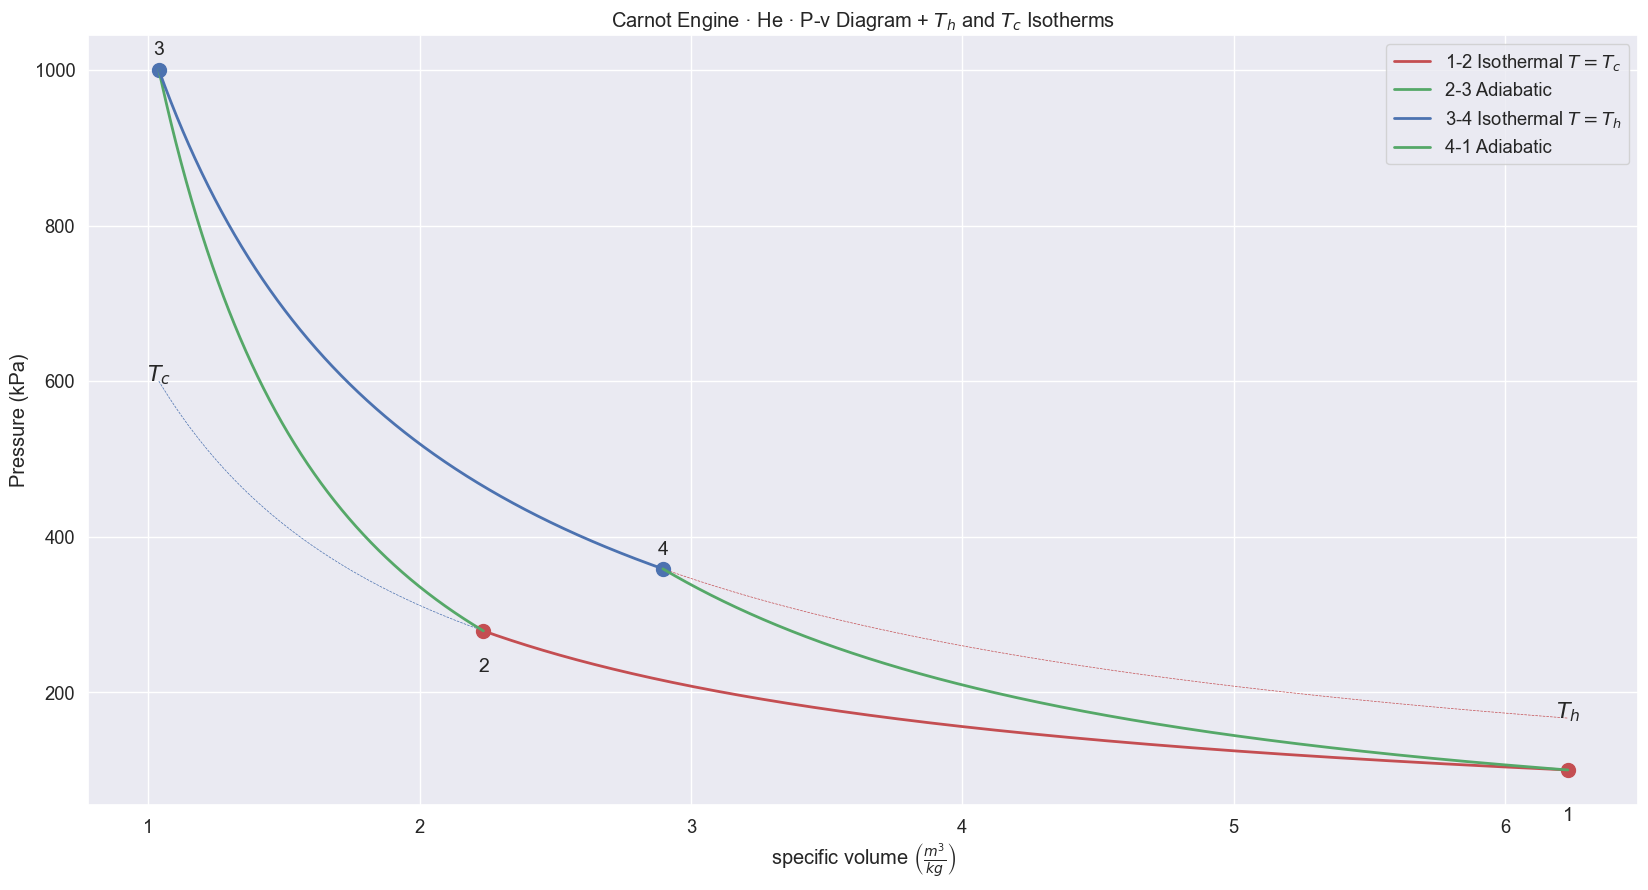

In [93]:
fig, ax = plt.subplots(figsize=(20, 10))

# Title
ax.set_title(r'Carnot Engine · He · P-v Diagram + $T_h$ and $T_c$ Isotherms')

# Isotherms
ax.plot(vh,ph,'r--',linewidth=0.5)  # Th
ax.plot(vc,pc,'b--',linewidth=0.5)  # Tc

# Isotherms annotations
ax.annotate(r'$T_c$', xy=(v3, P1*v1/v3), xytext=(v3, P1*v1/v3), fontsize=16, ha='center')  # Th
ax.annotate(r'$T_h$', xy=(v1, P3*v3/v1), xytext=(v1, P3*v3/v1), fontsize=16, ha='center')  # Tc

# State markers
ax.plot(v1, P1, 'ro', markersize=10)  # State 1
ax.plot(v2, P2, 'ro', markersize=10)  # State 2
ax.plot(v3, P3, 'bo', markersize=10)  # State 3
ax.plot(v4, P4, 'bo', markersize=10)  # State 4

# State annotations
ax.annotate('1', xy=(v1, P1), xytext=(v1, P1*0.35), fontsize=14, ha='center')  # State 1
ax.annotate('2', xy=(v2, P2), xytext=(v2, P2*0.81), fontsize=14, ha='center')  # State 2
ax.annotate('3', xy=(v3, P3), xytext=(v3, P3*1.02), fontsize=14, ha='center')  # State 3
ax.annotate('4', xy=(v4, P4), xytext=(v4, P4*1.05), fontsize=14, ha='center')  # State 4

# Process curves
ax.plot(v12, P12, 'r-', linewidth=2, label=r'1-2 Isothermal $T=T_c$')  # 1➛2: Isothermal
ax.plot(v23, P23, 'g-', linewidth=2, label= '2-3 Adiabatic')           # 2➛3: Adiabatic
ax.plot(v34, P34, 'b-', linewidth=2, label=r'3-4 Isothermal $T=T_h$')  # 3➛4: Isothermal
ax.plot(v41, P41, 'g-', linewidth=2, label= '4-1 Adiabatic')           # 4➛1: Adiabatic

# Axis labels
ax.set_ylabel('Pressure (kPa)')
ax.set_xlabel(r'specific volume $\left(\frac{m^3}{kg}\right)$')

ax.grid(True)                # Enable grid
ax.legend(loc='upper right') # Show legend and adjusts its position to minimize overlap

plt.show()